In [82]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف ماتریس انتقالات هلیکال کوادروپل
def helical_quadrupole_matrix(L, k):
    cos_kl = np.cos(k * L)
    sin_kl = np.sin(k * L)
    M_x = np.array([[cos_kl, sin_kl/k, 0, 0],
                    [-k*sin_kl, cos_kl, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])
    M_y = np.array([[1, 0, 0, 0],
                    [0, 1, 0, 0],
                    [0, 0, cos_kl, sin_kl/k],
                    [0, 0, -k*sin_kl, cos_kl]])
    return M_x, M_y

# سازی
L = 0.5 
k = 3

# انتقال
M_x, M_y = helical_quadrupole_matrix(L/num_steps, k)




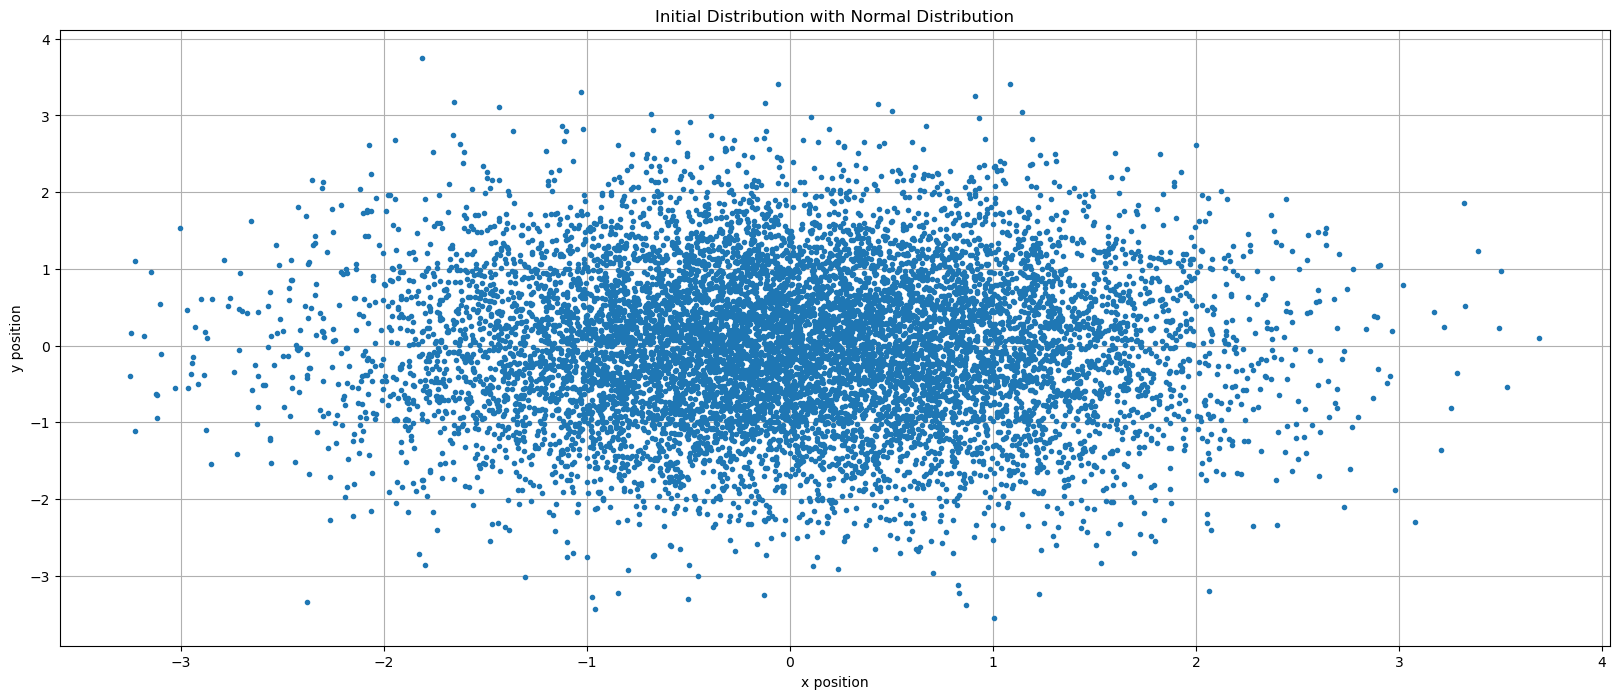

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف تعداد ذرات و انحراف معیارهای سیگما
num_particles = 10000
sigma_x = 1.0  # مقدار فرضی برای انحراف معیار x
sigma_y = 1.0  # مقدار فرضی برای انحراف معیار y
sigma_x2 = 0.1  # مقدار فرضی برای انحراف معیار x'
sigma_y2 = 0.1  # مقدار فرضی برای انحراف معیار y'

# تعریف ماتریس اولیه بر اساس سیگما x و سیگما y با استفاده از توزیع نرمال
initial_positions = np.zeros((num_particles, 4))
initial_positions[:, 0] = np.random.normal(0, sigma_x, num_particles)  # x positions
initial_positions[:, 1] = np.random.normal(0, sigma_x2, num_particles)  # x' positions
initial_positions[:, 2] = np.random.normal(0, sigma_y, num_particles)  # y positions
initial_positions[:, 3] = np.random.normal(0, sigma_y2, num_particles)  # y' positions

# رسم نمودار
plt.figure(figsize=(20,8))
plt.plot(initial_positions[:, 0], initial_positions[:, 2], '.')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Initial Distribution with Normal Distribution')
plt.grid(True)
plt.show()


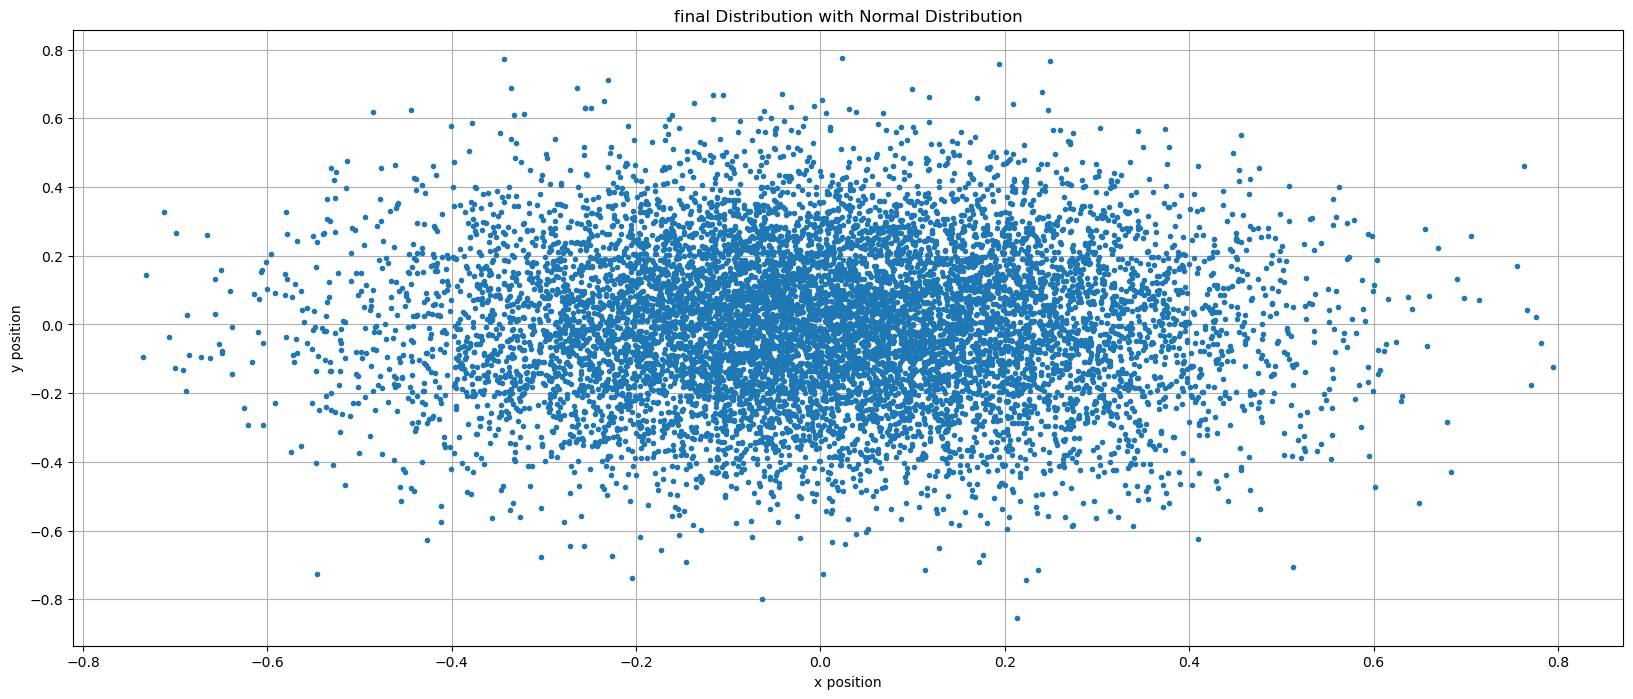

In [84]:
# دریافت ماتریس‌های انتقال
num_steps = 10
M_x, M_y = helical_quadrupole_matrix(L/num_steps, k)
L = 0.5  
k = 3



# ذخیره‌سازی موقعیت‌ها
positions = np.zeros((num_steps, num_particles, 4))
positions[0] = initial_positions


for step in range(1, num_steps):
    for i in range(num_particles):
        # به‌روز‌رسانی موقعیت با ضرب داخلی
        positions[step, i,:] = M_y @ (M_x @ positions[step-1, i,:])  
plt.figure(figsize=(20, 8))
plt.plot(positions[-1,:, 0], positions[-1,:, 2],'.')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('final Distribution with Normal Distribution')
plt.grid(True)
plt.show()



In [85]:
import numpy as np

# تعریف ماتریس چرخشی برای زاویه اصلی (theta = -ks/2)
def rotation_matrix(k, s):
    angle = -k * s / 2  # زاویه اصلی ks/2
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    R = np.array([
        [cos_angle, 0, sin_angle, 0],
        [0, cos_angle, 0, sin_angle],
        [-sin_angle, 0, cos_angle, 0],
        [0, -sin_angle, 0, cos_angle]
    ])
    return R

# تعریف ماتریس سیگما
def sigma_inner_matrix(k, K, A_H, A_L):
    sigma = np.zeros((4, 4))
    
    sigma[0, 0] = (4 * k**2 + 4 * K) / k**2 * A_H**2 + (k**2 / K**2) * A_L**2
    sigma[1, 1] = 16 * (K**2 / k**2) * A_H**2
    sigma[2, 2] = 4 * A_H**2 + (k**2 - 4 * K) / K**2 * A_L**2
    sigma[3, 3] = 4 * A_L**2
    
    sigma[0, 2] = sigma[2, 0] = 2 * (k / K) * A_L**2
    sigma[1, 3] = sigma[3, 1] = 8 * (K / k) * A_H**2

    return sigma

# تابع محاسبه ماتریس سیگما نهایی
def sigma_matrix(k, s, K, A_H, A_L):
    R_plus = rotation_matrix(k, s)  # R(ks/2)
    R_minus = rotation_matrix(-k, s)  # R(-ks/2)
    
    sigma_inner = sigma_inner_matrix(k, K, A_H, A_L)
    
    # ترتیب ضرب ماتریس‌ها
    sigma_final = R_plus @ sigma_inner @ R_minus
    return sigma_final

# پارامترهای ورودی
k = 3   # مقدار k
K = k**2/8   # مقدار K
A_H = 0.5 # مقدار فرضی برای A_H
A_L = 0.3 # مقدار فرضی برای A_L
s = 0.4   # مقدار s

# محاسبه ماتریس سیگما
sigma = sigma_matrix(k, s, K, A_H, A_L)

# چاپ ماتریس سیگما نهایی
print("Sigma Matrix:\n", sigma)


Sigma Matrix:
 [[ 1.17574584  0.          0.38131042  0.        ]
 [ 0.         -0.20109059  0.          0.36613727]
 [ 0.38131042  0.          1.90925416  0.        ]
 [ 0.          0.36613727  0.          1.12359059]]


In [86]:
# محاسبه TWISS PARAMETER

import numpy as np

# تعریف ماتریس چرخشی برای زاویه اصلی (theta = ks/2)
def rotation_matrix(k, s):
    angle = -k * s / 2  # زاویه اصلی ks/2
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    R = np.array([
        [cos_angle, 0, sin_angle, 0],
        [0, cos_angle, 0, sin_angle],
        [-sin_angle, 0, cos_angle, 0],
        [0, -sin_angle, 0, cos_angle]
    ])
    return R

# تعریف ماتریس سیگما
def sigma_inner_matrix(k, K, A_H, A_L):
    sigma = np.zeros((4, 4))
    
    sigma[0, 0] = (4 * k**2 + 4 * K) / k**2 * A_H**2 + (k**2 / K**2) * A_L**2
    sigma[1, 1] = 16 * (K**2 / k**2) * A_H**2
    sigma[2, 2] = 4 * A_H**2 + (k**2 - 4 * K) / K**2 * A_L**2
    sigma[3, 3] = 44 * A_L**2
    
    sigma[0, 2] = sigma[2, 0] = 2 * (k / K) * A_L**2
    sigma[1, 3] = sigma[3, 1] = 8 * (K / k) * A_H**2

    return sigma

# تابع محاسبه ماتریس سیگما نهایی
def sigma_matrix(k, s, K, A_H, A_L):
    R_plus = rotation_matrix(k, s)  # R(ks/2)
    R_minus = rotation_matrix(-k, s)  # R(-ks/2)
    
    sigma_inner = sigma_inner_matrix(k, K, A_H, A_L)
    
    # ترتیب ضرب ماتریس‌ها
    sigma_final = R_plus @ sigma_inner @ R_minus
    return sigma_final

# توابع محاسبه امیتنس و پارامترهای بتا، آلفا و گاما
def compute_emittance(cov_matrix):
    return np.sqrt(np.linalg.det(cov_matrix))

def compute_twist_parameters(cov_matrix, emittance):
    beta = cov_matrix[0, 0] / emittance
    alpha = -cov_matrix[0, 1] / emittance
    gamma = cov_matrix[1, 1] / emittance
    return beta, alpha, gamma

# پارامترهای ورودی
k = 3   # مقدار k
K = k**2/8   # مقدار K
A_H = 0.5 # مقدار فرضی برای A_H
A_L = 0.3 # مقدار فرضی برای A_L
s = 0.4   # مقدار s

# محاسبه ماتریس سیگما
sigma = sigma_matrix(k, s, K, A_H, A_L)

# چاپ ماتریس سیگما نهایی
print("Sigma Matrix:\n", sigma)

# استخراج ماتریس‌های کواریانس برای صفحات x و y
cov_x = sigma[:2, :2]
cov_y = sigma[2:, 2:]

# محاسبه امیتنس و پارامترهای بتا، آلفا و گاما برای صفحات x و y
emittance_x = compute_emittance(cov_x)
beta_x, alpha_x, gamma_x = compute_twist_parameters(cov_x, emittance_x)

emittance_y = compute_emittance(cov_y)
beta_y, alpha_y, gamma_y = compute_twist_parameters(cov_y, emittance_y)

# چاپ نتایج
print(f"Emittance (x-plane): {emittance_x:.4f}")
print(f"Beta (x-plane): {beta_x:.4f}")
print(f"Alpha (x-plane): {alpha_x:.4f}")
print(f"Gamma (x-plane): {gamma_x:.4f}")

print(f"\nEmittance (y-plane): {emittance_y:.4f}")
print(f"Beta (y-plane): {beta_y:.4f}")
print(f"Alpha (y-plane): {alpha_y:.4f}")
print(f"Gamma (y-plane): {gamma_y:.4f}")


Sigma Matrix:
 [[ 1.17574584  0.          0.38131042  0.        ]
 [ 0.          0.94666545  0.         -1.31153308]
 [ 0.38131042  0.          1.90925416  0.        ]
 [ 0.         -1.31153308  0.          3.57583455]]
Emittance (x-plane): 1.0550
Beta (x-plane): 1.1144
Alpha (x-plane): -0.0000
Gamma (x-plane): 0.8973

Emittance (y-plane): 2.6129
Beta (y-plane): 0.7307
Alpha (y-plane): -0.0000
Gamma (y-plane): 1.3685


In [87]:
# محاسبه FINAL TWISS PARAMETER

import numpy as np

# پارامترهای تویست اولیه برای صفحه x و y
beta0_x = 1.1144
alpha0_x = -0.0000
gamma0_x = 0.8973

beta0_y = 0.7307
alpha0_y = -0.0000
gamma0_y = 1.3685

# ماتریس سیگما اولیه برای صفحات x و y
sigma_initial_x = np.array([
    [beta0_x, -alpha0_x],
    [-alpha0_x, gamma0_x]
])

sigma_initial_y = np.array([
    [beta0_y, -alpha0_y],
    [-alpha0_y, gamma0_y]
])

# تعریف ماتریس انتقالات هلیکال کوادروپل
def helical_quadrupole_matrix(L, k):
    cos_kl = np.cos(k * L)
    sin_kl = np.sin(k * L)
    M_x = np.array([[cos_kl, sin_kl/k, 0, 0],
                    [-k*sin_kl, cos_kl, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])
    M_y = np.array([[1, 0, 0, 0],
                    [0, 1, 0, 0],
                    [0, 0, cos_kl, sin_kl/k],
                    [0, 0, -k*sin_kl, cos_kl]])
    return M_x, M_y

# پارامترهای ورودی برای ماتریس انتقال
L = 0.5   # طول فضای درایفت
k = 3     # مقدار k

# محاسبه ماتریس انتقال
M_x, M_y = helical_quadrupole_matrix(L, k)

# اعمال ماتریس انتقال روی ماتریس سیگما اولیه
# توجه: ماتریس انتقال باید بر اساس ماتریس سیگما نهایی 4x4 ساخته شود.
sigma_initial_4x4_x = np.pad(sigma_initial_x, ((0, 2), (0, 2)), mode='constant')
sigma_initial_4x4_y = np.pad(sigma_initial_y, ((2, 0), (2, 0)), mode='constant')

sigma_final_x = M_x @ sigma_initial_4x4_x @ M_x.T
sigma_final_y = M_y @ sigma_initial_4x4_y @ M_y.T

# توابع محاسبه امیتنس و پارامترهای بتا، آلفا و گاما
def compute_emittance(cov_matrix):
    return np.sqrt(np.linalg.det(cov_matrix))

def compute_twist_parameters(cov_matrix, emittance):
    beta = cov_matrix[0, 0] / emittance
    alpha = -cov_matrix[0, 1] / emittance
    gamma = cov_matrix[1, 1] / emittance
    return beta, alpha, gamma

# استخراج ماتریس‌های کواریانس برای صفحات x و y
cov_x_final = sigma_final_x[:2, :2]
cov_y_final = sigma_final_y[2:, 2:]

# محاسبه امیتنس و پارامترهای تویست نهایی برای صفحات x و y
emittance_x_final = compute_emittance(cov_x_final)
beta_x_final, alpha_x_final, gamma_x_final = compute_twist_parameters(cov_x_final, emittance_x_final)

emittance_y_final = compute_emittance(cov_y_final)
beta_y_final, alpha_y_final, gamma_y_final = compute_twist_parameters(cov_y_final, emittance_y_final)

# چاپ نتایج
print("Final Twiss Parameters for x-plane:")
print(f"Emittance: {emittance_x_final:.4f}")
print(f"Beta: {beta_x_final:.4f}")
print(f"Alpha: {alpha_x_final:.4f}")
print(f"Gamma: {gamma_x_final:.4f}")

print("\nFinal Twiss Parameters for y-plane:")
print(f"Emittance: {emittance_y_final:.4f}")
print(f"Beta: {beta_y_final:.4f}")
print(f"Alpha: {alpha_y_final:.4f}")
print(f"Gamma: {gamma_y_final:.4f}")


Final Twiss Parameters for x-plane:
Emittance: 1.0000
Beta: 0.1048
Alpha: 0.2148
Gamma: 9.9841

Final Twiss Parameters for y-plane:
Emittance: 1.0000
Beta: 0.1550
Alpha: 0.1225
Gamma: 6.5504
